# Data preprocessing

In [94]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import os

## Extract for team-based data

Extract table(s), how ever many you want

In [95]:
# List XML files
xml_files = [
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Utah Valley/Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based).xml",
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Utah Valley/Utah Valley Wolverines - California Baptist Lancers 2-3 (Team-based).xml",
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Utah Valley/Utah Valley Wolverines - California Baptist Lancers 4-1 (Team-based).xml",
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Utah Valley/Utah Valley Wolverines - Grand Canyon Lopes 3-0 (Team-based).xml",
    "/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Utah Valley/Utah Valley Wolverines - Abilene Christian  Wildcats 4-1 (Team-based).xml"
]

all_rows = []

for file in xml_files:
    tree = ET.parse(file)
    root = tree.getroot()

    # Extract match name from filename (remove .xml)
    match_name = os.path.splitext(os.path.basename(file))[0]

    # Extract all instance elements
    instances = root.find("ALL_INSTANCES").findall("instance")

    for inst in instances:
        row = {
            'match_name': match_name,  # New column for match name
            'ID': inst.findtext('ID'),
            'code': inst.findtext('code'),
            'start': inst.findtext('start'),
            'end': inst.findtext('end')
        }

        players = []
        for label in inst.findall('label'):
            group = label.findtext('group')
            text = label.findtext('text')

            if group == '10 - Players':
                players.append(text)
            else:
                row[group] = text

        row['10 - Players'] = ', '.join(players)
        all_rows.append(row)

# Convert to DataFrame
team_data = pd.DataFrame(all_rows)

# Convert numeric columns
numeric_cols = [
    '11 - Start location X',
    '12 - Start location Y',
    '13 - Duration',
    '15 - End location X',
    '16 - End location Y'
]

for col in numeric_cols:
    if col in team_data.columns:
        team_data[col] = pd.to_numeric(team_data[col], errors='coerce')

team_data.reset_index(drop=True, inplace=True)

In [96]:
team_data.head(10)

,match_name,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,...,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
0,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),1,Ball in play,3.110023,6.507241,Middle third,Center,Final third,Left flank,Short,...,53.0,34.0,2.0,3-4-2-1,11.0,63.0,,NaN,NaN,NaN
1,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),2,Seattle Redhawks - Possessions,3.110023,6.507241,Middle third,Center,Final third,Left flank,Short,...,53.0,34.0,2.0,3-4-2-1,11.0,63.0,,NaN,NaN,NaN
2,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),3,Ball in play,6.497241,9.930326,Own third,Right flank,Own third,Right flank,Short,...,11.0,63.0,2.0,4-2-3-1,88.0,9.0,"5. Nelson, 9. Brady",NaN,NaN,NaN
3,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),4,Utah Valley Wolverines - Possessions,6.497241,9.930326,Own third,Right flank,Own third,Right flank,Short,...,11.0,63.0,2.0,4-2-3-1,88.0,9.0,"5. Nelson, 9. Brady",NaN,NaN,NaN
4,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),5,Ball in play,20.487368,37.095438,Own third,Right flank,Final third,Right flank,Medium,...,17.0,59.0,14.0,4-2-3-1,13.0,9.0,"11. Funn, 5. Nelson",NaN,NaN,NaN
5,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),6,Utah Valley Wolverines - Possessions,20.487368,37.095438,Own third,Right flank,Final third,Right flank,Medium,...,17.0,59.0,14.0,4-2-3-1,13.0,9.0,"11. Funn, 5. Nelson",NaN,NaN,NaN
6,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),7,Ball in play,37.085438,45.390196,Own third,Left flank,Own third,Left flank,Short,...,13.0,9.0,7.0,3-4-2-1,80.0,60.0,"3. Smith, 0. Kirgan",Low,NaN,NaN
7,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),8,Seattle Redhawks - Possessions,37.085438,45.390196,Own third,Left flank,Own third,Left flank,Short,...,13.0,9.0,7.0,3-4-2-1,80.0,60.0,"3. Smith, 0. Kirgan",Low,NaN,NaN
8,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),9,Ball in play,45.380196,51.724486,Final third,Right flank,Final third,Center,Short,...,80.0,60.0,6.0,4-2-3-1,3.0,33.0,"5. Nelson, 9. Brady, 25. Jackson, 2. Webber",High,NaN,NaN
9,Seattle Redhawks - Utah Valley Wolverines 3-3 (Team-based),10,Utah Valley Wolverines - Possessions,45.380196,51.724486,Final third,Right flank,Final third,Center,Short,...,80.0,60.0,6.0,4-2-3-1,3.0,33.0,"5. Nelson, 9. Brady, 25. Jackson, 2. Webber",High,NaN,NaN


In [97]:
for code in team_data['code'].unique():
    print(code)  

Ball in play
Seattle Redhawks - Possessions
Utah Valley Wolverines - Possessions
Utah Valley Wolverines - Open play attacks
Utah Valley Wolverines - Crosses
Seattle Redhawks - Open play attacks
Seattle Redhawks - Shots
Seattle Redhawks - Crosses
Utah Valley Wolverines - Goalkeeper distributions
Seattle Redhawks - Highlights
Seattle Redhawks - Goals
Utah Valley Wolverines - Set Pieces
Utah Valley Wolverines - Throw ins
Seattle Redhawks - Set Pieces
Seattle Redhawks - Throw ins
Seattle Redhawks - Free kicks
Utah Valley Wolverines - Highlights
Utah Valley Wolverines - Goals
Utah Valley Wolverines - Shots
Seattle Redhawks - Corners
Seattle Redhawks - Goalkeeper distributions
Utah Valley Wolverines - Corners
Utah Valley Wolverines - Free kicks
Periods
California Baptist Lancers - Possessions
California Baptist Lancers - Set Pieces
California Baptist Lancers - Throw ins
California Baptist Lancers - Open play attacks
California Baptist Lancers - Crosses
California Baptist Lancers - Goalkeeper

In [98]:
for Outcome in team_data['07 - Outcome'].unique():
    print(Outcome)  

nan
Shot
Goal
Shot on goal


## Extract for player-based data

In [99]:
# Load XML
tree = ET.parse("/Users/hungduong/Documents/MSBA UofU/MSBA 3rd/Soccer Analytics/Utah Valley/Utah Valley Wolverines - California Baptist Lancers 2-3 (Player-based).xml")
root = tree.getroot()

# Prepare list for rows
data = []

# Iterate over each instance
for inst in root.findall('.//instance'):
    row = {}
    row['ID'] = int(inst.findtext('ID'))
    row['Player Code'] = inst.findtext('code')
    row['Start Time'] = float(inst.findtext('start'))
    row['End Time'] = float(inst.findtext('end'))

    # Extract all <text> labels
    labels = [label.findtext('text') for label in inst.findall('label')]
    if labels:
        row['Action Type'] = labels[0]                   # Primary label
        row['Additional Labels'] = ', '.join(labels[1:]) # Others (if any)
    else:
        row['Action Type'] = None
        row['Additional Labels'] = ''

    data.append(row)

# Convert to DataFrame
player_data = pd.DataFrame(data)


In [100]:
pd.set_option('display.max_colwidth', None)
player_data.head(10)


,ID,Player Code,Start Time,End Time,Action Type,Additional Labels
0,1,18. Cobabe,2.958473,6.958473,Touch,Carry
1,2,18. Cobabe,3.026674,8.026674,Pass,"Forward pass, Pass to final third, Short or medium pass"
2,3,20. Allen,4.546682,8.546682,Duel,"Defensive duel, Dribbled past attempt, Ground duel"
3,4,8. Hladek,5.129711,9.129711,Duel,"Dribble, Ground duel, Offensive duel, Carry"
4,5,15. White,5.129711,9.129711,Duel,"Defensive duel, Ground duel"
5,6,8. Hladek,6.889258,10.889258,Duel,"Foul suffered, Ground duel, Offensive duel"
6,7,20. Allen,5.537676,12.537676,Infraction,Foul
7,8,8. Hladek,11.839013,15.839013,Free kick,
8,9,27. Owens,14.349355,21.656866,Pass,"Back pass, Short or medium pass"
9,10,0. Graham,18.656866,52.501457,Pass,"Goalkeeper action, Lateral pass, Short or medium pass"


In [101]:
print(len(player_data))
# Data missingness
print(player_data.isna().count())
# Data types?
player_data.dtypes

1482
ID                   1482
Player Code          1482
Start Time           1482
End Time             1482
Action Type          1482
Additional Labels    1482
dtype: int64


ID                     int64
Player Code           object
Start Time           float64
End Time             float64
Action Type           object
Additional Labels     object
dtype: object

### Add optional team column for player_data (chatgpt this real quick)

In [102]:
# lmu_players = [
#     "1. Hoover", "16. Schaefer", "6. Watkins", "24. Myklebust", "5. Rucker",
#     "10. Winter", "23. Land", "19. McCulloch", "9. Groves", "7. Harrington", "4. Dobbs",
#     "15. Lynch", "30. Smith"
# ]

# gonzaga_players = [
#     "0. Towne", "2. Chin", "4. Werner", "10. Lester", "7. Warta", "13. Le",
#     "14. Severn", "20. Gray", "21. Rigg", "11. Garcia", "19. Alexander",
#     "17. Sicilia", "3. Jones", "5. Boyden", "28. Todd", "22. Parker",
#     "12. Ewers", "9. Tonthat"
# ]

utah_valley_players = [
    "0. Graham", "5. Nelson", "11. Funn", "27. Owens", "4. Davis",
    "16. Shirts", "3. Bonds", "9. Brady", "18. Cobabe", "8. Hladek", "2. Webber",
    "26. Garcia", "10. Lim", "14. Beardall", "7. Oyler", "25. Jackson", "17. Lester", "0. Wolf",
    "16. Preston", "18. Libske", "2. Ingram", "5. Westlund", "9. Petrov"
]

california_baptist_lancers_players = [
    "0. O'Brien", "14. Scranton", "20. Allen", "21. Heinen", "33. Westlund",
    "7. Ramirez", "10. Summit", "24. Castro", "8. Hauck", "15. White", "42. Blumfeldt",
    "3. Held", "29. Harmon", "4. Witz", "27. Goossen-Brown", "11. Mau", "25. Roe", "23. Marsh"
]



player_to_team = {p: "Utah Valley" for p in utah_valley_players}
player_to_team.update({p: "California Baptist Lance" for p in california_baptist_lancers_players})

player_data['Team'] = player_data['Player Code'].map(player_to_team)



In [103]:
player_data.head()

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
0,1,18. Cobabe,2.958473,6.958473,Touch,Carry,Utah Valley
1,2,18. Cobabe,3.026674,8.026674,Pass,"Forward pass, Pass to final third, Short or medium pass",Utah Valley
2,3,20. Allen,4.546682,8.546682,Duel,"Defensive duel, Dribbled past attempt, Ground duel",California Baptist Lance
3,4,8. Hladek,5.129711,9.129711,Duel,"Dribble, Ground duel, Offensive duel, Carry",Utah Valley
4,5,15. White,5.129711,9.129711,Duel,"Defensive duel, Ground duel",California Baptist Lance


Available actions of player_data in Action Type

In [104]:
for action in player_data['Action Type'].dropna().unique():
    print(action)

Touch
Pass
Duel
Infraction
Free kick
Throw in
Interception
Clearance
Goal kick
Shot
Corner
Shot against
Offside
Acceleration
Goalkeeper exit


# Analytics

## Corners 

Filter for corner kicks in team_data

In [105]:


team_corners = team_data[team_data['code'].str.contains('Utah Valley Wolverines - Corners')]
pd.set_option('display.max_colwidth', None)
team_corners.tail()

,match_name,ID,code,start,end,01 - Location third,02 - Location flank,03 - End location third,04 - End location flank,05 - Length,...,11 - Start location X,12 - Start location Y,13 - Duration,14 - Formation,15 - End location X,16 - End location Y,10 - Players,08 - Transition,07 - Outcome,09 - xG
5513,Utah Valley Wolverines - Abilene Christian Wildcats 4-1 (Team-based),335,Utah Valley Wolverines - Corners,1666.507606,1668.988837,Final third,Right flank,Final third,Right flank,Short,...,105.0,68.0,1.0,4-2-3-1,2.0,21.0,14. Beardall,NaN,NaN,NaN
6085,Utah Valley Wolverines - Abilene Christian Wildcats 4-1 (Team-based),907,Utah Valley Wolverines - Corners,4069.994985,4084.321102,Final third,Right flank,Final third,Center,Short,...,105.0,68.0,10.0,4-2-3-1,1.0,32.0,"14. Beardall, 5. Nelson, 26. Garcia, 11. Funn",NaN,Shot,from 0.1 to 0.35
6132,Utah Valley Wolverines - Abilene Christian Wildcats 4-1 (Team-based),954,Utah Valley Wolverines - Corners,4351.789322,4358.954567,Final third,Left flank,Final third,Center,Short,...,105.0,0.0,6.0,4-2-3-1,8.0,29.0,"16. Shirts, 4. Davis, 14. Beardall",NaN,NaN,NaN
6169,Utah Valley Wolverines - Abilene Christian Wildcats 4-1 (Team-based),991,Utah Valley Wolverines - Corners,4609.282314,4616.418038,Final third,Left flank,Final third,Center,Short,...,105.0,0.0,4.0,4-2-3-1,105.0,41.0,"16. Shirts, 18. Cobabe",NaN,NaN,NaN
6339,Utah Valley Wolverines - Abilene Christian Wildcats 4-1 (Team-based),1161,Utah Valley Wolverines - Corners,5619.671227,5634.616452,Final third,Right flank,Final third,Center,Medium,...,105.0,68.0,10.0,4-2-3-1,2.0,34.0,"12. Wright, 6. Gemza, 26. Garcia",NaN,Shot on goal,less than 0.1


Further filter by outcome for visualization

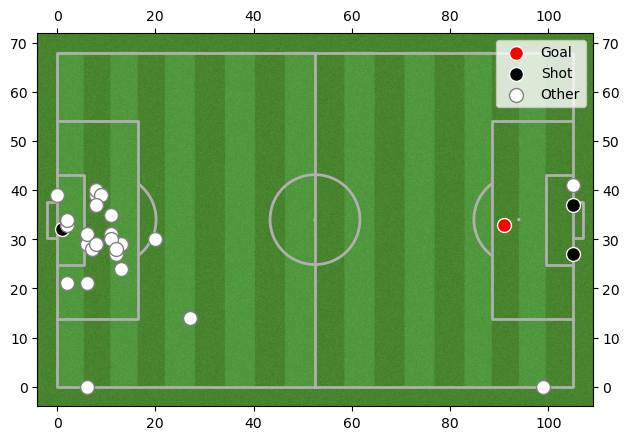

In [106]:

# Filter by outcome
corners_goal = team_corners[team_corners['07 - Outcome'] == 'Goal']
corners_shot = team_corners[team_corners['07 - Outcome'] == 'Shot']
corners_other = team_corners[
    (team_corners['07 - Outcome'] != 'Goal') & 
    (team_corners['07 - Outcome'] != 'Shot')
]
# Draw pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    #half=True, 
    label=True, axis=True, tick=True
)
fig, ax = pitch.draw()

# Plot Goal events in red
ax.scatter(
    corners_goal['15 - End location X'],
    corners_goal['16 - End location Y'],
    c='red', s=100, edgecolors='white', label='Goal'
)

# Plot Shot events in black
ax.scatter(
    corners_shot['15 - End location X'],
    corners_shot['16 - End location Y'],
    c='black', s=100, edgecolors='white', label='Shot'
)

# Plot all other events in white
ax.scatter(
    corners_other['15 - End location X'],
    corners_other['16 - End location Y'],
    c='white', s=100, edgecolors='gray', label='Other'
)

# Add legend and show
plt.legend()
plt.show()

<Axes: xlabel='10 - Players'>

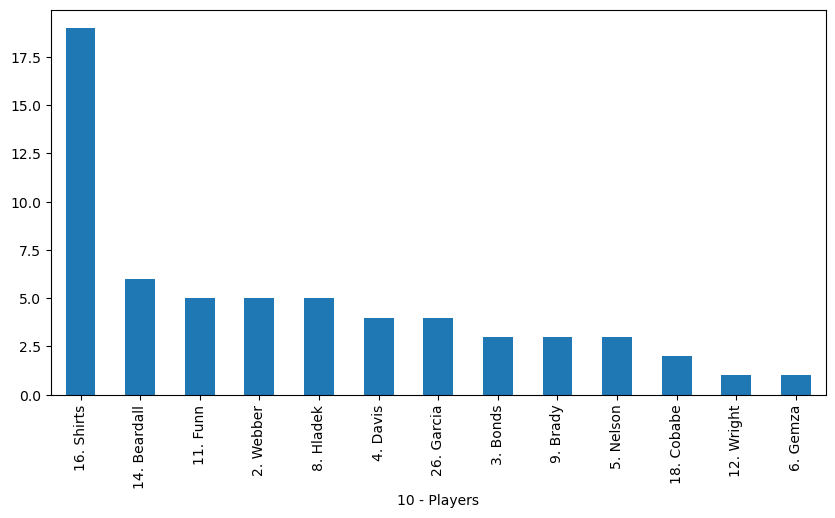

In [107]:
# Who parricipated in corner kicks the most?
team_corners['10 - Players'].str.split(',')\
    .explode().str.strip()\
    .value_counts()\
    .plot(kind='bar', figsize=(10, 5))

## Goal kicks

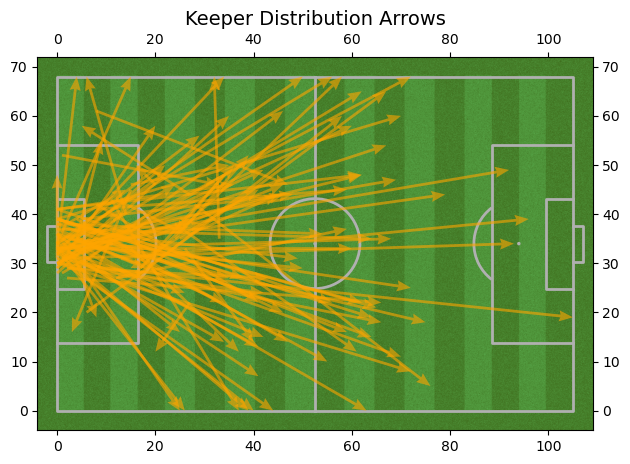

In [139]:
team_keep_distribution = team_data[(team_data['code']=='Utah Valley Wolverines - Goalkeeper distributions')]

# Draw pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    #half=True, 
    label=True, axis=True, tick=True
)
fig, ax = pitch.draw()

# Draw arrows
pitch.arrows(
    xstart=team_keep_distribution['11 - Start location X'],
    ystart=team_keep_distribution['12 - Start location Y'],
    xend=team_keep_distribution['15 - End location X'],
    yend=team_keep_distribution['16 - End location Y'],
    color='orange',
    ax=ax,
    width=2,
    headwidth=4,
    alpha=0.6,
    zorder=3
)

plt.title("Keeper Distribution Arrows", fontsize=14)
plt.show()

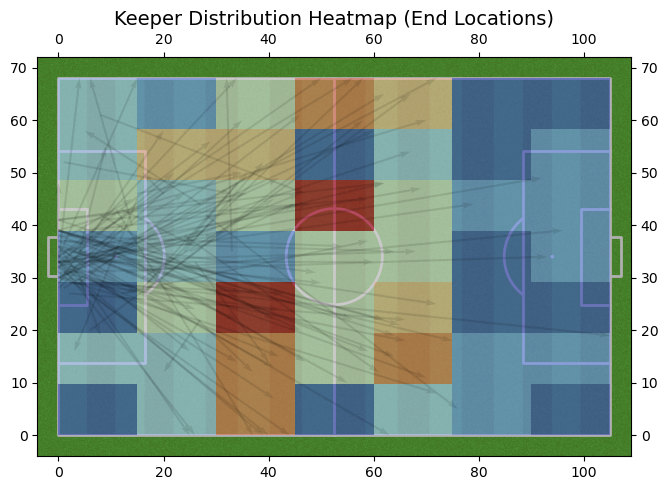

In [115]:
# Extract coordinates
x_start = team_keep_distribution['11 - Start location X']
y_start = team_keep_distribution['12 - Start location Y']
x_end = team_keep_distribution['15 - End location X']
y_end = team_keep_distribution['16 - End location Y']

# Set up the pitch
pitch = Pitch(
    pitch_length=105, pitch_width=68, pitch_type='uefa',
    pitch_color='grass', stripe=True, goal_type='box',
    label=True, axis=True, tick=True
)

fig, ax = pitch.draw(figsize=(8, 5))

# Plot heatmap of start locations
bin_stat = pitch.bin_statistic(x_end, y_end, statistic='count', bins=(7, 7))
pitch.heatmap(bin_stat, ax=ax, cmap='coolwarm', alpha=0.6)

# Optional: overlay arrows (lighter and less prominent)
pitch.arrows(
    xstart=x_start,
    ystart=y_start,
    xend=x_end,
    yend=y_end,
    color='black',
    ax=ax,
    width=1.5,
    headwidth=3,
    alpha=0.1,   # Lower alpha to avoid clutter
    zorder=2
)

# Title
plt.title("Keeper Distribution Heatmap (End Locations)", fontsize=14)
plt.show()


<Axes: xlabel='10 - Players'>

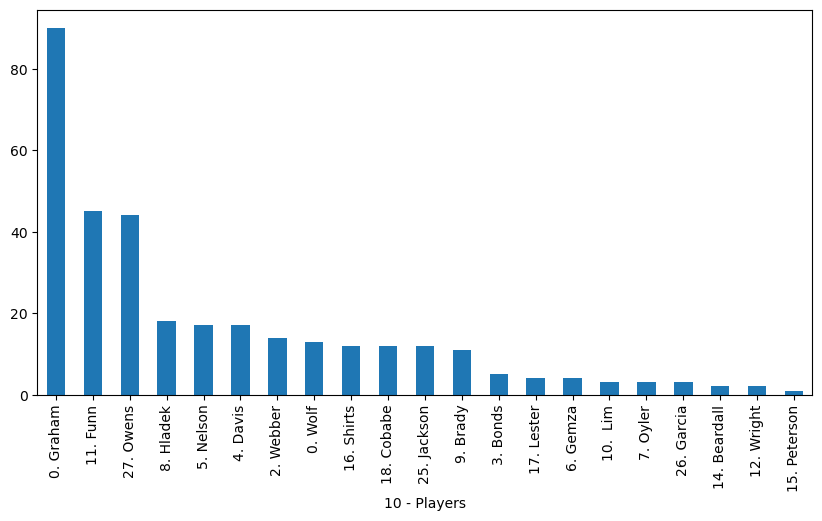

In [116]:
team_keep_distribution['10 - Players'].str.split(',')\
    .explode().str.strip()\
    .value_counts()\
    .plot(kind='bar', figsize=(10, 5))

## Player data keep distribution receiver

In [119]:
pd.set_option('display.max_rows', None)
player_data.head(100)

,ID,Player Code,Start Time,End Time,Action Type,Additional Labels,Team
0,1,18. Cobabe,2.958473,6.958473,Touch,Carry,Utah Valley
1,2,18. Cobabe,3.026674,8.026674,Pass,"Forward pass, Pass to final third, Short or medium pass",Utah Valley
2,3,20. Allen,4.546682,8.546682,Duel,"Defensive duel, Dribbled past attempt, Ground duel",California Baptist Lance
3,4,8. Hladek,5.129711,9.129711,Duel,"Dribble, Ground duel, Offensive duel, Carry",Utah Valley
4,5,15. White,5.129711,9.129711,Duel,"Defensive duel, Ground duel",California Baptist Lance
5,6,8. Hladek,6.889258,10.889258,Duel,"Foul suffered, Ground duel, Offensive duel",Utah Valley
6,7,20. Allen,5.537676,12.537676,Infraction,Foul,California Baptist Lance
7,8,8. Hladek,11.839013,15.839013,Free kick,,Utah Valley
8,9,27. Owens,14.349355,21.656866,Pass,"Back pass, Short or medium pass",Utah Valley
9,10,0. Graham,18.656866,52.501457,Pass,"Goalkeeper action, Lateral pass, Short or medium pass",Utah Valley


In [138]:
import pandas as pd

results = []

# Loop through all rows in the original DataFrame
for i in range(len(player_data) - 1):  # stop 1 row before the end
    row = player_data.iloc[i]
    next_row = player_data.iloc[i + 1]

    # Step 1: only consider Utah Valley Goal kicks
    if row['Action Type'] == "Goal kick" and row['Team'] == "Utah Valley":
        receiver = next_row['Player Code']
        receiver_team = next_row['Team']

        # Step 2: only track Funn or Owens as GK receivers
        if receiver in ["11. Funn", "27. Owens"] and receiver_team == "Utah Valley":
            # Step 3: scan forward to find next Utah Valley player
            for j in range(i + 2, len(player_data)):
                next_player = player_data.iloc[j]
                next_team = next_player['Team']

                if next_team == "Utah Valley" and next_player['Player Code'] != receiver:
                    next_receiver = next_player['Player Code']
                    results.append((receiver, next_receiver))
                    break  # stop at first UVU teammate

# Convert results to DataFrame and summarize
df_chain = pd.DataFrame(results, columns=['GK Receiver', 'Next Receiver'])
summary = df_chain.value_counts().reset_index(name="Count")
print(summary)


  GK Receiver Next Receiver  Count
0   27. Owens      11. Funn      3
1    11. Funn     5. Nelson      2
2   27. Owens     0. Graham      2
3   27. Owens      4. Davis      2
4    11. Funn     27. Owens      1
5    11. Funn      7. Oyler      1
6    11. Funn      9. Brady      1
7   27. Owens    18. Cobabe      1
8   27. Owens      9. Brady      1
